In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re

In [2]:
import nltk

Reading the CSV file

In [3]:
reviews = pd.read_csv("movie.csv")
reviews

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


Checking for unique values

In [4]:
reviews.nunique()

text     39723
label        2
dtype: int64

In [5]:
reviews['label'].unique()

array([0, 1], dtype=int64)

PERFORMING EDA

Checking for null values

In [6]:
print(reviews['text'].isnull().sum())
print(reviews['label'].isnull().sum()) 

0
0


Deleting duplcates

In [7]:
reviews = reviews.drop_duplicates() 
reviews

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


Checking for imbalance

In [8]:
reviews['label'].value_counts() 

label
1    19908
0    19815
Name: count, dtype: int64

Looking at Review_Length vs Sentiment graph

In [9]:
reviews['length'] = reviews['text'].str.len()
#reviews['Length'] = reviews['text'].apply(len)
reviews

C:\Users\kaika\AppData\Local\Temp\ipykernel_149736\3945335736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['length'] = reviews['text'].str.len()


,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


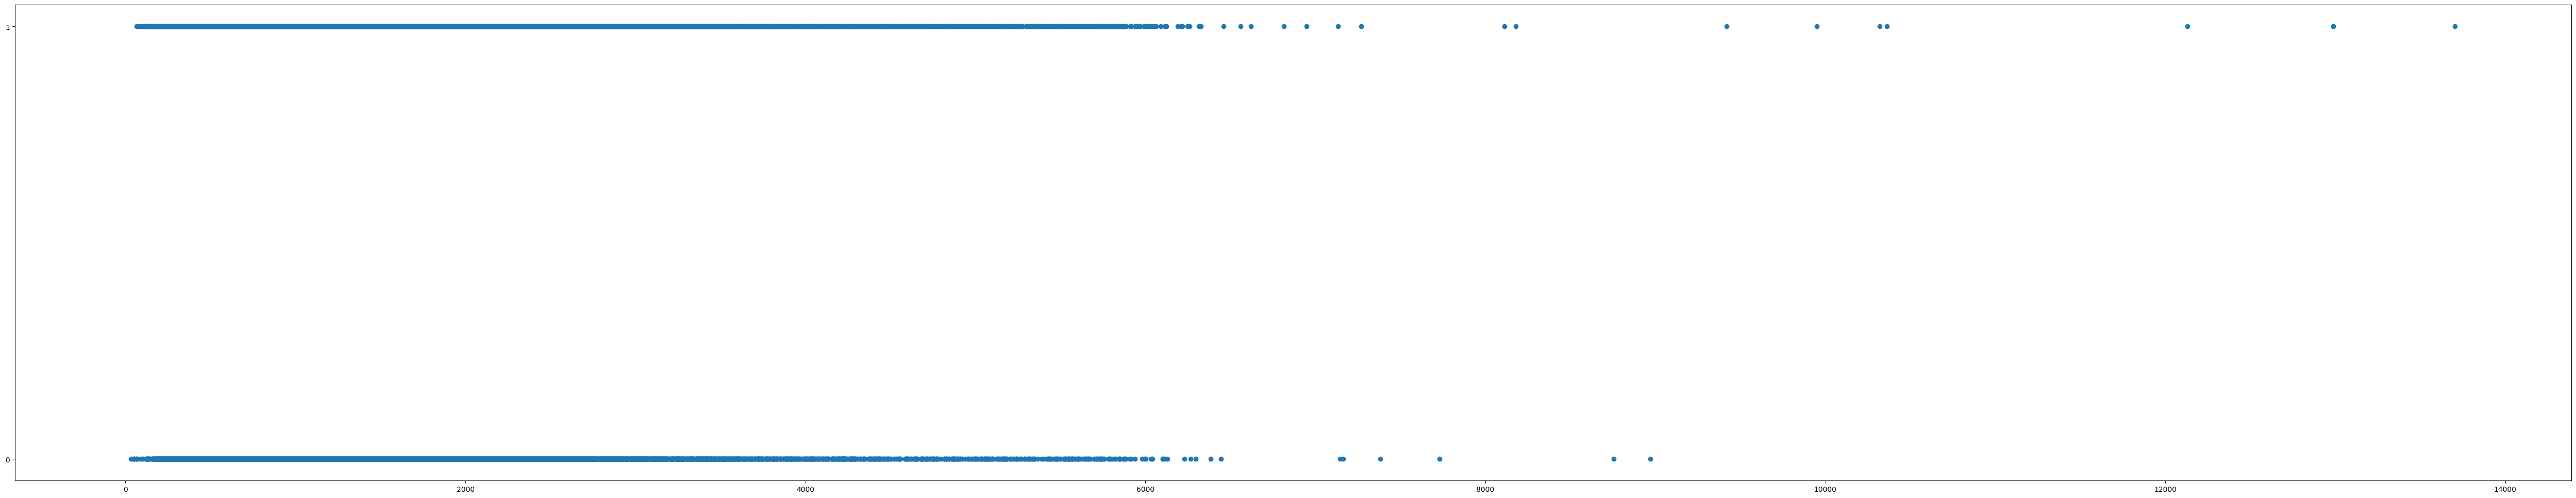

In [10]:
plt.figure(figsize=(64,12))
plt.scatter(data = reviews, y = 'label', x = 'length')
plt.yticks([0,1])
plt.show()
#sb.scatterplot(y='length', x='label', data = reviews)

In [11]:
reviews = reviews.drop(['length'], axis=1)

DATA PRE-PROCESSING

In [12]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

Converting to lowercase

In [13]:
reviews['text']=reviews['text'].str.lower() 
reviews

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1
...,...,...
39995,"""western union"" is something of a forgotten cl...",1
39996,this movie is an incredible piece of work. it ...,1
39997,my wife and i watched this movie because we pl...,0
39998,"when i first watched flatliners, i was amazed....",1


Removing stopwords

In [14]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
stop_words = set(stopwords.words('english')) 
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
def remove_stop(x): 
    removed = ""
    for word in str(x).split():
        if word not in stop_words:
            removed = removed + word + " "
    return(removed)

reviews['text']=reviews['text'].apply(lambda x : remove_stop(x)) 
reviews

,text,label
0,grew (b. 1965) watching loving thunderbirds. m...,0
1,"put movie dvd player, sat coke chips, expectat...",0
2,people know particular time past like feel nee...,0
3,"even though great interest biblical movies, bo...",0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,"""western union"" something forgotten classic we...",1
39996,movie incredible piece work. explores every no...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,"first watched flatliners, amazed. necessary fe...",1


Removing punctuations

In [17]:
def remove_punc(x): 
    x = re.sub(pattern= "[^\w\s]", repl= "", string= x)
    return x

"""
def remove_punc(x):
    removed = ""
    punc =  '''!()-[]{};:'"\,./?@#$%^&*_~'''
    for i in x:
        if i not in punc:
            removed += i
    return (removed)
"""

reviews['text']=reviews['text'].apply(lambda x : remove_punc(x)) 
reviews

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\,'
C:\Users\kaika\AppData\Local\Temp\ipykernel_149736\2436398989.py:2: SyntaxWarning: invalid escape sequence '\w'
  x = re.sub(pattern= "[^\w\s]", repl= "", string= x)
C:\Users\kaika\AppData\Local\Temp\ipykernel_149736\2436398989.py:5: SyntaxWarning: invalid escape sequence '\,'
  """


,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


Train/Test split

In [18]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(reviews['text'], reviews['label'], test_size=0.2) 

text_train

#training = pd.DataFrame(text_train, label_train)

8118     perhaps one canadians read book high school th...
25687    watched three mad max films succession first t...
27176    started good sketch comedy first shows good lo...
21086    experience head really need understand monkees...
16553    catholic taught parochial elementary schools n...
                               ...                        
33363    anyone lived ages revenge nerds girlpower appr...
39708    british comedies tend fall one two main types ...
14414    70s afghanistan pushtun boy amir zekeria ebrah...
27645    scale 1 10 gave 4 thought film good much viole...
18874    hard tell film aimed at characterisation style...
Name: text, Length: 31778, dtype: object

Tokenizing

In [19]:
#text_train=text_train.apply(lambda x : nltk.word_tokenize(x)) 
#text_train

Stemming

In [20]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [21]:
'''
def stem_text(x):
    for word in x:
        word1 = stemmer.stem(word)
        x.replace(word, word1)
    return x 
'''

'''
def stem_text(x): 
    for i in range(len(x)):
        x[i]=stemmer.stem(x[i])
    return x
'''
def stem_text(x):
    l = x.split()
    for i in range(len(l)):
        l[i]=stemmer.stem(l[i])
    x = " ".join(l)
    return x

text_train=text_train.apply(lambda x : stem_text(x)) 
text_test=text_test.apply(lambda x : stem_text(x))
text_train 

8118     perhap one canadian read book high school thou...
25687    watch three mad max film success first time da...
27176    start good sketch comedi first show good look ...
21086    experi head realli need understand monke film ...
16553    cathol taught parochi elementari school nun ta...
                               ...                        
33363    anyon live age reveng nerd girlpow appreci fil...
39708    british comedi tend fall one two main type qui...
14414    70 afghanistan pushtun boy amir zekeria ebrahi...
27645    scale 1 10 gave 4 thought film good much viole...
18874    hard tell film aim at characteris style smack ...
Name: text, Length: 31778, dtype: object

FEATURE EXTRACTION

Count Vectoriser / Multi Label Binarizer

In [22]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.preprocessing import MultiLabelBinarizer

In [23]:

'''
count_vec = MultiLabelBinarizer(sparse_output=True)
mlb = count_vec.fit(text_train)
matrix = mlb.transform(text_train)

matrix
'''

#pd.DataFrame(matrix, columns = [mlb.classes_])

#vectorizer = CountVectorizer()
#vectorizer.fit(text_train)
#matrix = vectorizer.fit_transform(text_train)

'\ncount_vec = MultiLabelBinarizer(sparse_output=True)\nmlb = count_vec.fit(text_train)\nmatrix = mlb.transform(text_train)\n\nmatrix\n'

TF IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vect = TfidfVectorizer().fit(text_train)

len(vect.get_feature_names_out())

108710

In [26]:
text_train_vectorized = vect.transform(text_train)
text_test_vectorized = vect.transform(text_test)

MAIN MODEL

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(text_train_vectorized, label_train)

LogisticRegression(max_iter=1000)

EVALUATION

Checking accuracy

In [29]:
score = classifier.score(text_test_vectorized, label_test)
score

0.8825676526117054

Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

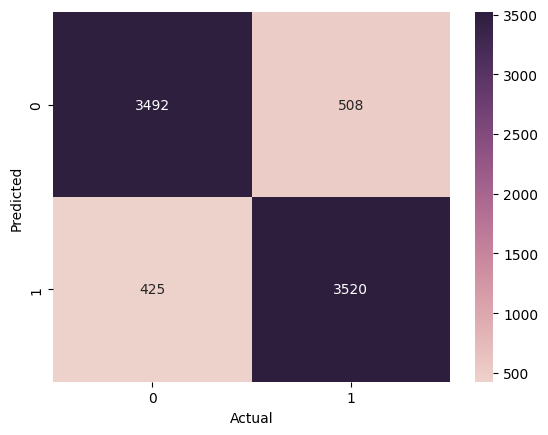

In [31]:
label_pred = classifier.predict(text_test_vectorized)
cm = confusion_matrix(label_test, label_pred, labels = reviews['label'].unique())
df_cm = pd.DataFrame(cm, index = reviews['label'].unique(), columns = reviews['label'].unique())
#df_cm
sb.heatmap(cm, annot=True , fmt="d", cmap=sb.cubehelix_palette(as_cmap=True))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
df_cm_per = df_cm.copy()
for i in df_cm_per:
    df_cm_per[i]/=df_cm_per[i].sum()
df_cm_per

,0,1
0,0.891499,0.126117
1,0.108501,0.873883


ROC curve

In [33]:
from sklearn.metrics import roc_curve, auc

In [34]:
fpr, tpr, threshold = roc_curve(label_test, label_pred)
#a_u_c = auc(fpr, tpr)

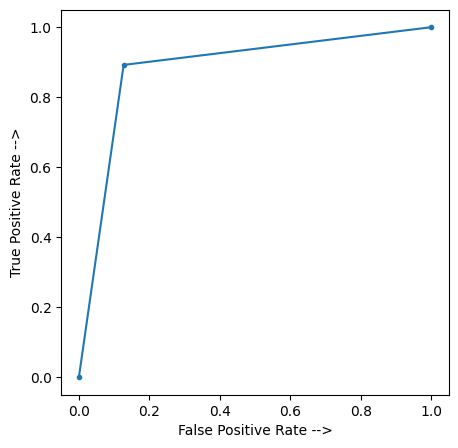

In [35]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.show()

F1 score

In [36]:
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4000
           1       0.87      0.89      0.88      3945

    accuracy                           0.88      7945
   macro avg       0.88      0.88      0.88      7945
weighted avg       0.88      0.88      0.88      7945

